In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (8, 4)

import warnings
warnings.filterwarnings("ignore")

In [2]:
co2 = pd.read_csv("co2.csv")
df = co2.copy()

## Data Preparation -  EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.shape

(7385, 12)

In [5]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.duplicated().sum()

1103

In [7]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [8]:
df.columns = ['Marka', 'Model', 'Araç Sinifi', 'Motor Hacmi (L)', 'Silindir Sayisi',
              'Şanziman', 'Yakit Türü', 'Şehir İçi Yakit Tüketimi (L/100 km)',
              'Şehir Dişi Yakit Tüketimi (L/100 km)', 'Ortalama Yakit Tüketimi (L/100 km)',
              'Ortalama Yakit Tüketimi (mpg)', 'CO2 Emisyonlari (g/km)']
df.columns

Index(['Marka', 'Model', 'Araç Sinifi', 'Motor Hacmi (L)', 'Silindir Sayisi',
       'Şanziman', 'Yakit Türü', 'Şehir İçi Yakit Tüketimi (L/100 km)',
       'Şehir Dişi Yakit Tüketimi (L/100 km)',
       'Ortalama Yakit Tüketimi (L/100 km)', 'Ortalama Yakit Tüketimi (mpg)',
       'CO2 Emisyonlari (g/km)'],
      dtype='object')

Eksik değer var mı?

In [9]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
Marka,0,0.0
Model,0,0.0
Araç Sinifi,0,0.0
Motor Hacmi (L),0,0.0
Silindir Sayisi,0,0.0
Şanziman,0,0.0
Yakit Türü,0,0.0
Şehir İçi Yakit Tüketimi (L/100 km),0,0.0
Şehir Dişi Yakit Tüketimi (L/100 km),0,0.0
Ortalama Yakit Tüketimi (L/100 km),0,0.0


In [10]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

Null değer olmadığını grafik üstünden de görelim

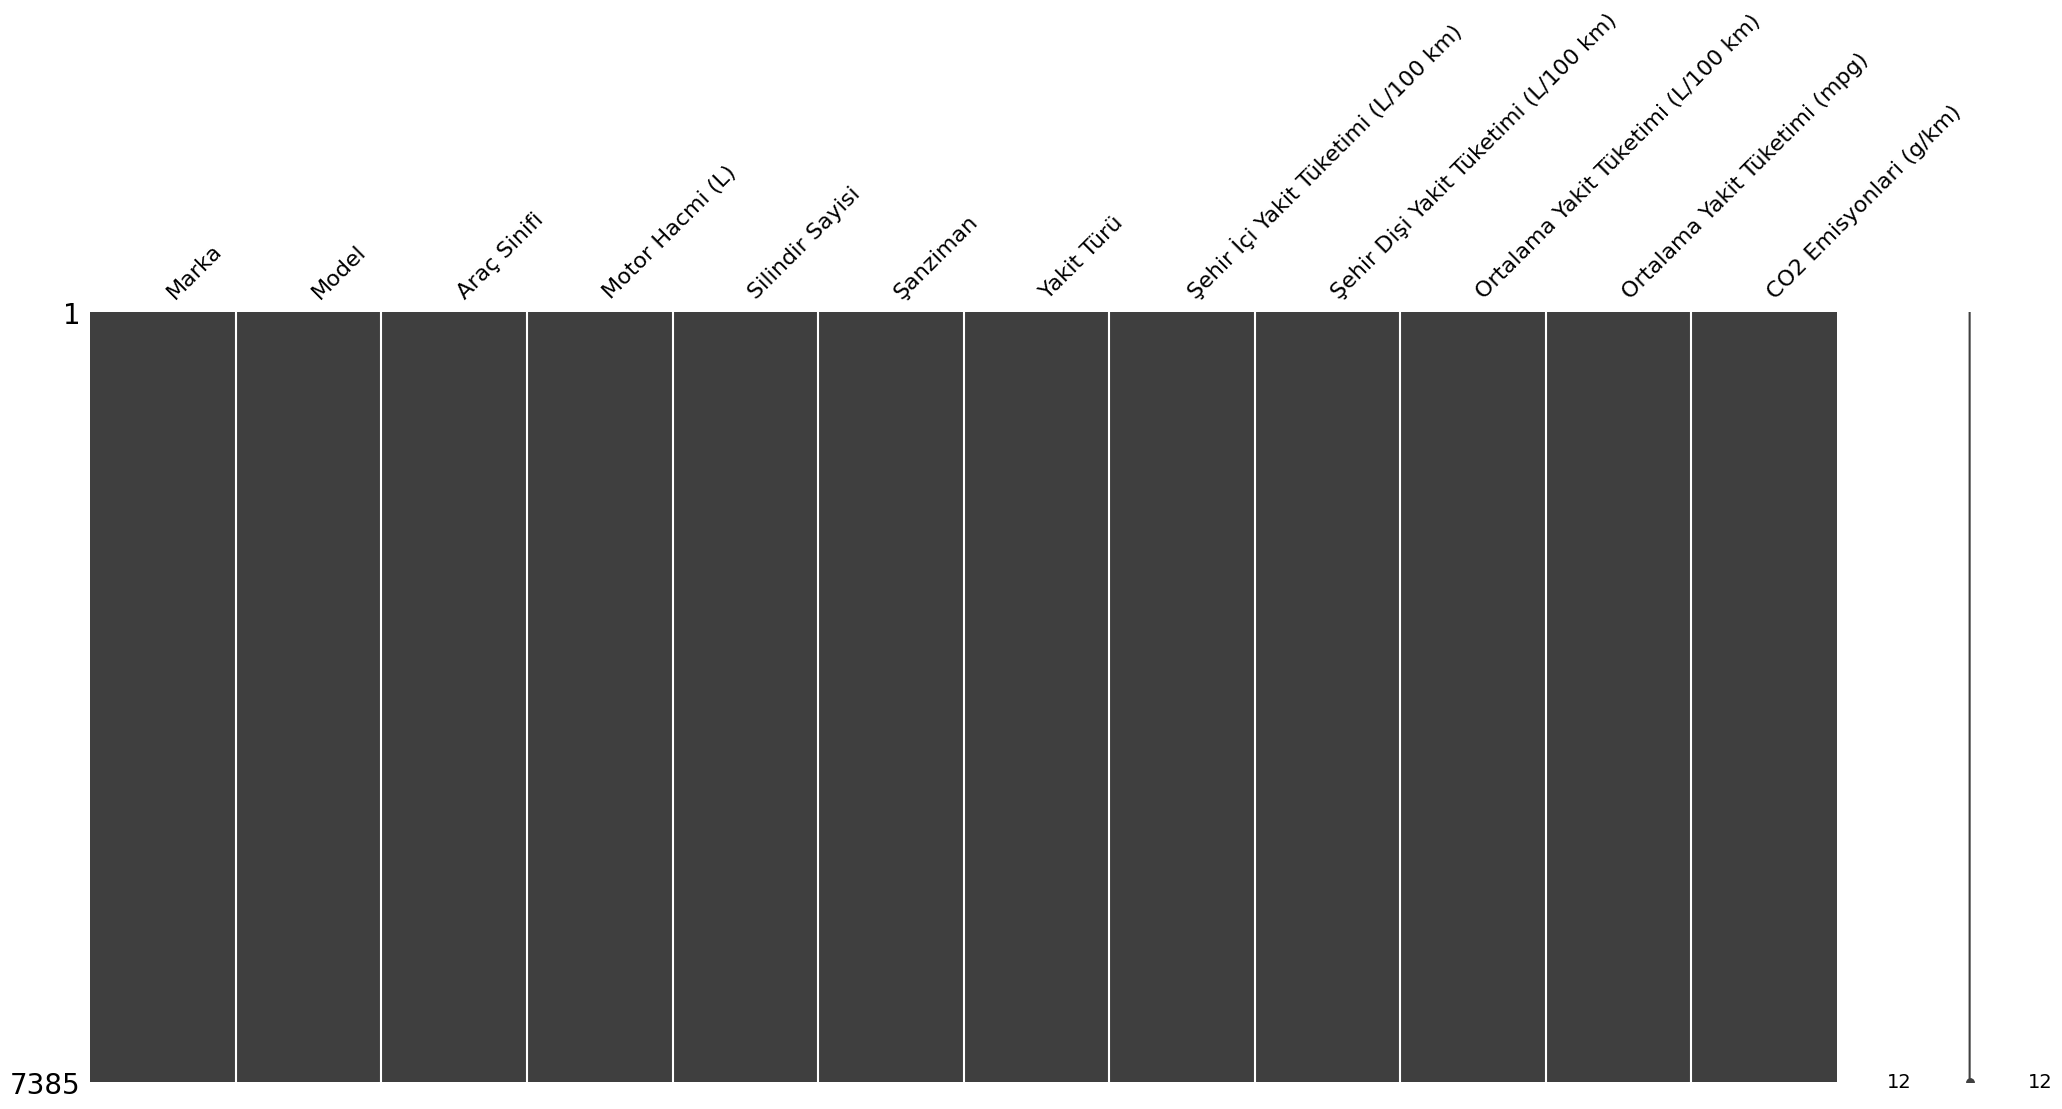

In [11]:
import missingno as msno
msno.matrix(df);

In [12]:
df["Marka"].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

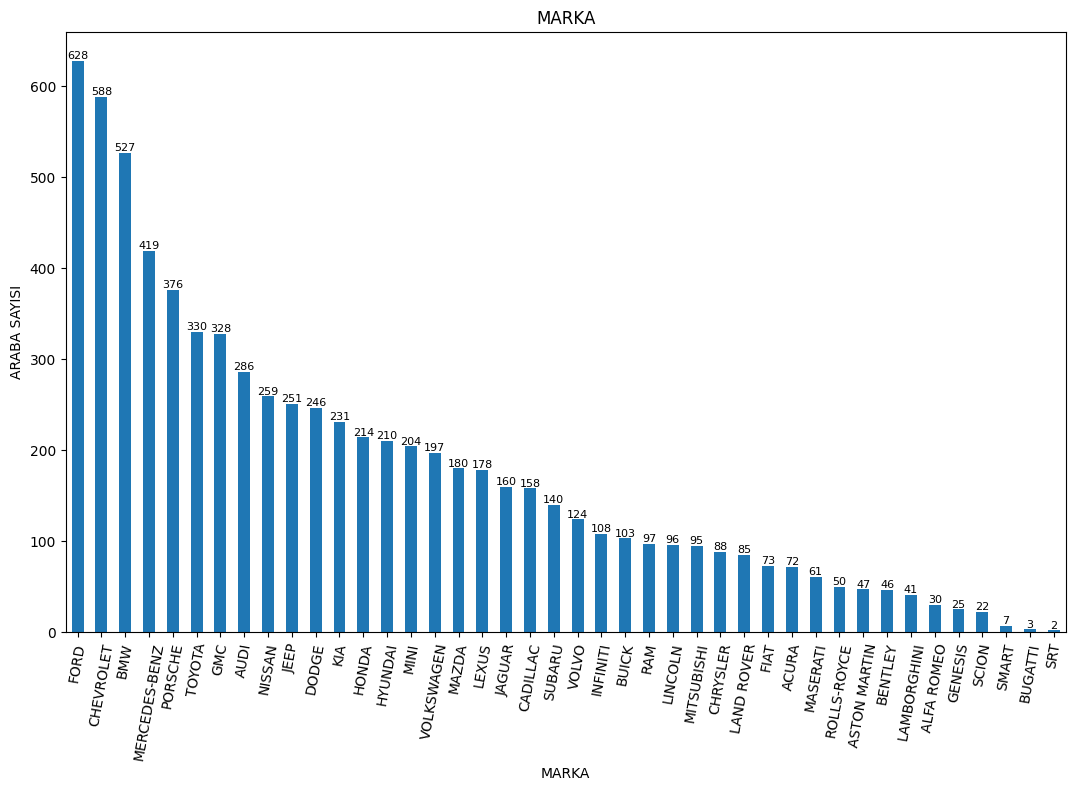

In [13]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.Marka.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('MARKA')   
plt.xlabel('MARKA') 
plt.ylabel('ARABA SAYISI')
plt.xticks(rotation = 80)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=8);

In [14]:
df.head(1)

,Marka,Model,Araç Sinifi,Motor Hacmi (L),Silindir Sayisi,Şanziman,Yakit Türü,Şehir İçi Yakit Tüketimi (L/100 km),Şehir Dişi Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (mpg),CO2 Emisyonlari (g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196


In [15]:
df["CO2 Emisyonlari (g/km)"].value_counts(ascending=True)

CO2 Emisyonlari (g/km)
385     1
372     1
428     1
103     1
154     1
       ..
294    76
230    77
214    77
221    82
242    85
Name: count, Length: 331, dtype: int64

In [16]:
df_sorted = df.sort_values(by='CO2 Emisyonlari (g/km)', ascending=False)
top_10_df = df_sorted.head(10)

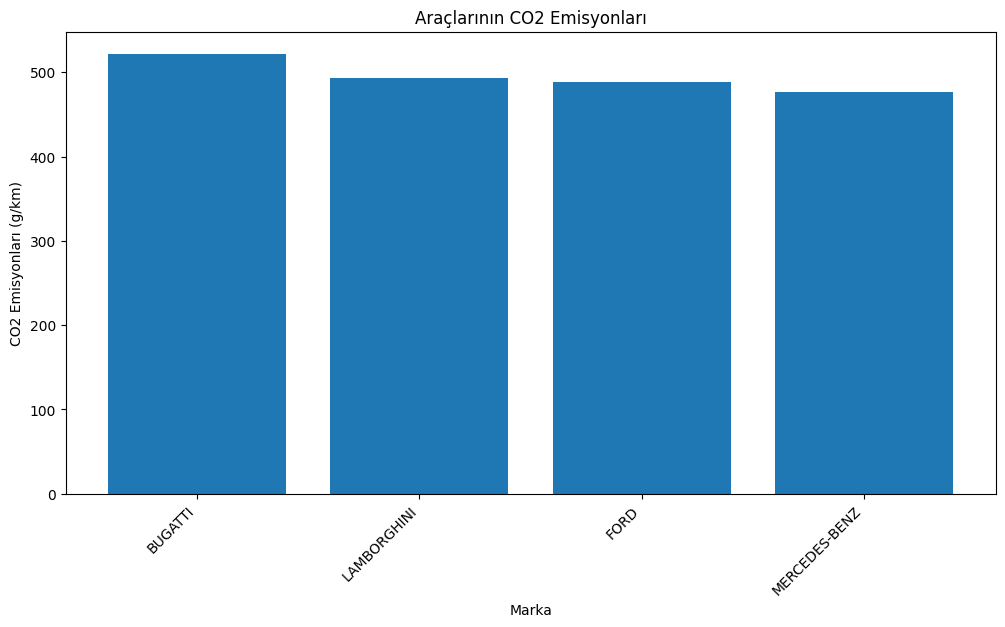

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_df['Marka'], top_10_df['CO2 Emisyonlari (g/km)'])
plt.title('Araçlarının CO2 Emisyonları')
plt.xlabel('Marka')
plt.ylabel('CO2 Emisyonları (g/km)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
df["Yakit Türü"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

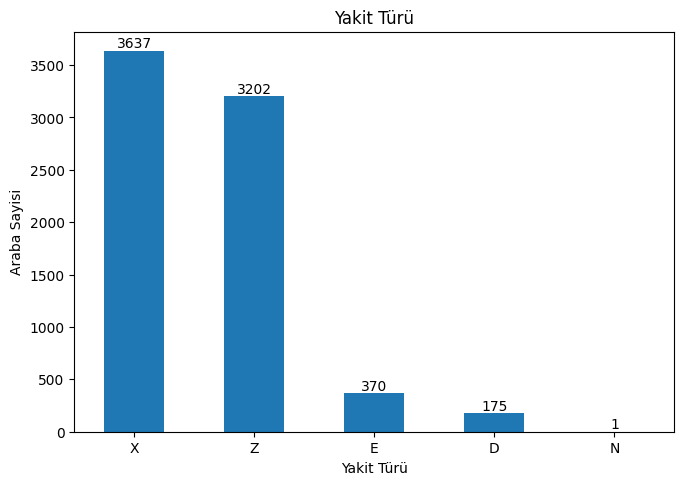

In [19]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df["Yakit Türü"].value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Yakit Türü')   
plt.xlabel('Yakit Türü') 
plt.ylabel('Araba Sayisi')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=10);

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Motor Hacmi (L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Silindir Sayisi,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Şehir İçi Yakit Tüketimi (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Şehir Dişi Yakit Tüketimi (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Ortalama Yakit Tüketimi (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Ortalama Yakit Tüketimi (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emisyonlari (g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


outlier var mı yok mu bilgi sahibi olabiliriz


(std> mean) veya yakın  ise outler değerler vardır 

bu data da böyle bir değer yok gibi gözüküyor ama kesin var veya yok diyemeyiz


In [21]:
df.describe(include="object").T

,count,unique,top,freq
Marka,7385,42,FORD,628
Model,7385,2053,F-150 FFV 4X4,32
Araç Sinifi,7385,16,SUV - SMALL,1217
Şanziman,7385,27,AS6,1324
Yakit Türü,7385,5,X,3637


In [22]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Marka[object],1. FORD2. CHEVROLET3. BMW4. MERCEDES-BENZ5. PORSCHE6. TOYOTA7. GMC8. AUDI9. NISSAN10. JEEP11. other,"628 (8.5%)588 (8.0%)527 (7.1%)419 (5.7%)376 (5.1%)330 (4.5%)328 (4.4%)286 (3.9%)259 (3.5%)251 (3.4%)3,393 (45.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEIklEQVR4nO3dTWobWQBG0VIjQmciYQxejBfRi+1FaDfGWINOyEQ90KTB+qmSnm7Afc44AhEuT1TxvmR1OBwmKPzxu78A/x9iIyM2MmIjIzYyYiMjNjJiIyM2Mqtpmr5P0/Rt4ed+HQ6HHw/4Pnxh6+fn5782m83Tkg/t9/v31Wr1t+BYYr3ZbJ5eX19/bLfbn3M+8PHx8edut3t6e3v7Nk2T2JhtPU3TtN1uf768vPyz4HPfH/R9+MI8IJARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5n1NB3vqM39wJI/C/+13u/377vd7mlacEdtv9+/T9P063Ffi6/IBoHMyj+ZReWWk82pxk0Wr6ssq7jVonWVZRX3uGVdZVnFTbzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7No8GLswj0WD16MXbiVa+FkDF7ILD3ZnGrcbNHgxdiFe8wevBi7cK+lgxdjF27mpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZ2YMXYxfutWjwYuzCPVwLJ2PwQsYDApm5P6N+PrnbrHWVVRUjXF1XWVUxytx1lVUVd/OAQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERubqusqqilFmrausqhjBtXAy1lVk5pxsTjWGuDp4MXZhlIuDF2MXRpozeDF2YQgvdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhcHLwYuzDS1cGLsQujuBZOxuCFzLWTzanGMBcHL8YujHR28GLswmjXBi/GLgzjpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZE5u66yrGK0i+sqyypGskEgY11FxslGxrqKjHUVGesqMl7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsa1cDIGL2QunWxONYY6O3gxdmG0k4MXYxce4dLgxdiFobzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Ny8GLswiOcHbwYuzCaa+FkDF7IeEAgc+5n1E8ow51cV1lW8Qif1lWWVTzKuXWVZRXDeUAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIj82ldZVnFo5xcV1lW8QiuhZOxriLjZCNj8ELG4IWMwQsZL3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh41o4GYMXMpf+ozSc8EOdHLxwZPgz1qfBC0eGP+OdG7xwZPgzkJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZD4NXjjydzLeycELR4Y/Y7kWfplr4QMZvJDxgEBGbGTERkZsZMRGRmxkxEZGbGTERuZfPL1O4seIfYQAAAAASUVORK5CYII="">",0(0.0%)
2,Model[object],1. F-150 FFV 4X42. F-150 FFV3. MUSTANG4. FOCUS FFV5. SONIC6. SONIC 57. F-150 4X48. F-1509. ACCORD10. COMPASS11. other,"32 (0.4%)32 (0.4%)27 (0.4%)24 (0.3%)20 (0.3%)20 (0.3%)20 (0.3%)20 (0.3%)19 (0.3%)19 (0.3%)7,152 (96.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADo0lEQVR4nO3cQWojVxhG0b+McNqTEkLgJSR78CJ6sb0ILSJ7MMY1iDueKIMEYtKdSaBvgXLOyGj0Bhc9SdTn5Xq9DhTu9j4A/x9iIyM2MmIjIzYyYiMjNjJiIyM2MsvMPMzMXK/Xt53Pwo07nM/nzzMzy7J8ERw/0t26rqd1XU8zc7/3YbhtPrORERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nDtm0vf/39vutJuHk2CGQW/zKLinc2MtZVZKyryPjpg4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGY+FkzF4IeOdjYzBCxmDFzJ++iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsZj4WQMXsj4zEbGNUrGuoqMdRUZn9nIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5HxWDgZ6yoyPrORuVuW5ZdlWT7tfRBu393M/DwzP+19EG6fa5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjczdzPw6M7/vfRBunw0CGdcoGbGRMXghY/BCxjVKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8hYV5FxjZIRGxnrKjLWVWRco2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHGNkhEbGYMXMgYvZFyjZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcY2SERsZsZGxriJjXUXGNUpGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRnXKBmxkTF4IWPwQsY1SkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGdcomWVmHmbmfu+DcHPer9fr28cXDufz+fO6rqe9TsRt2rbtZVmWLx+DO6zrenp6eno7Ho9f9zwct+P19fXT5XI5PT8/38/M37HNzByPx6+Pj4+/7XY6btHDP1/wBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MYebPR0L2Pgi34996Omzb9nK5XE7znUdC4L/atu1lZt4/vuaxcH6Ubx4Lt64i4wsCGbGRERsZsZERGxmxkREbGbGRERuZPwC/n67sAVvbuQAAAABJRU5ErkJggg=="">",0(0.0%)
3,Araç Sinifi[object],1. SUV - SMALL2. MID-SIZE3. COMPACT4. SUV - STANDARD5. FULL-SIZE6. SUBCOMPACT7. PICKUP TRUCK - STANDARD8. TWO-SEATER9. MINICOMPACT10. STATION WAGON - SMALL11. other,"1,217 (16.5%)1,133 (15.3%)1,022 (13.8%)735 (10.0%)639 (8.7%)606 (8.2%)538 (7.3%)460 (6.2%)326 (4.4%)252 (3.4%)457 (6.2%)","<img sr

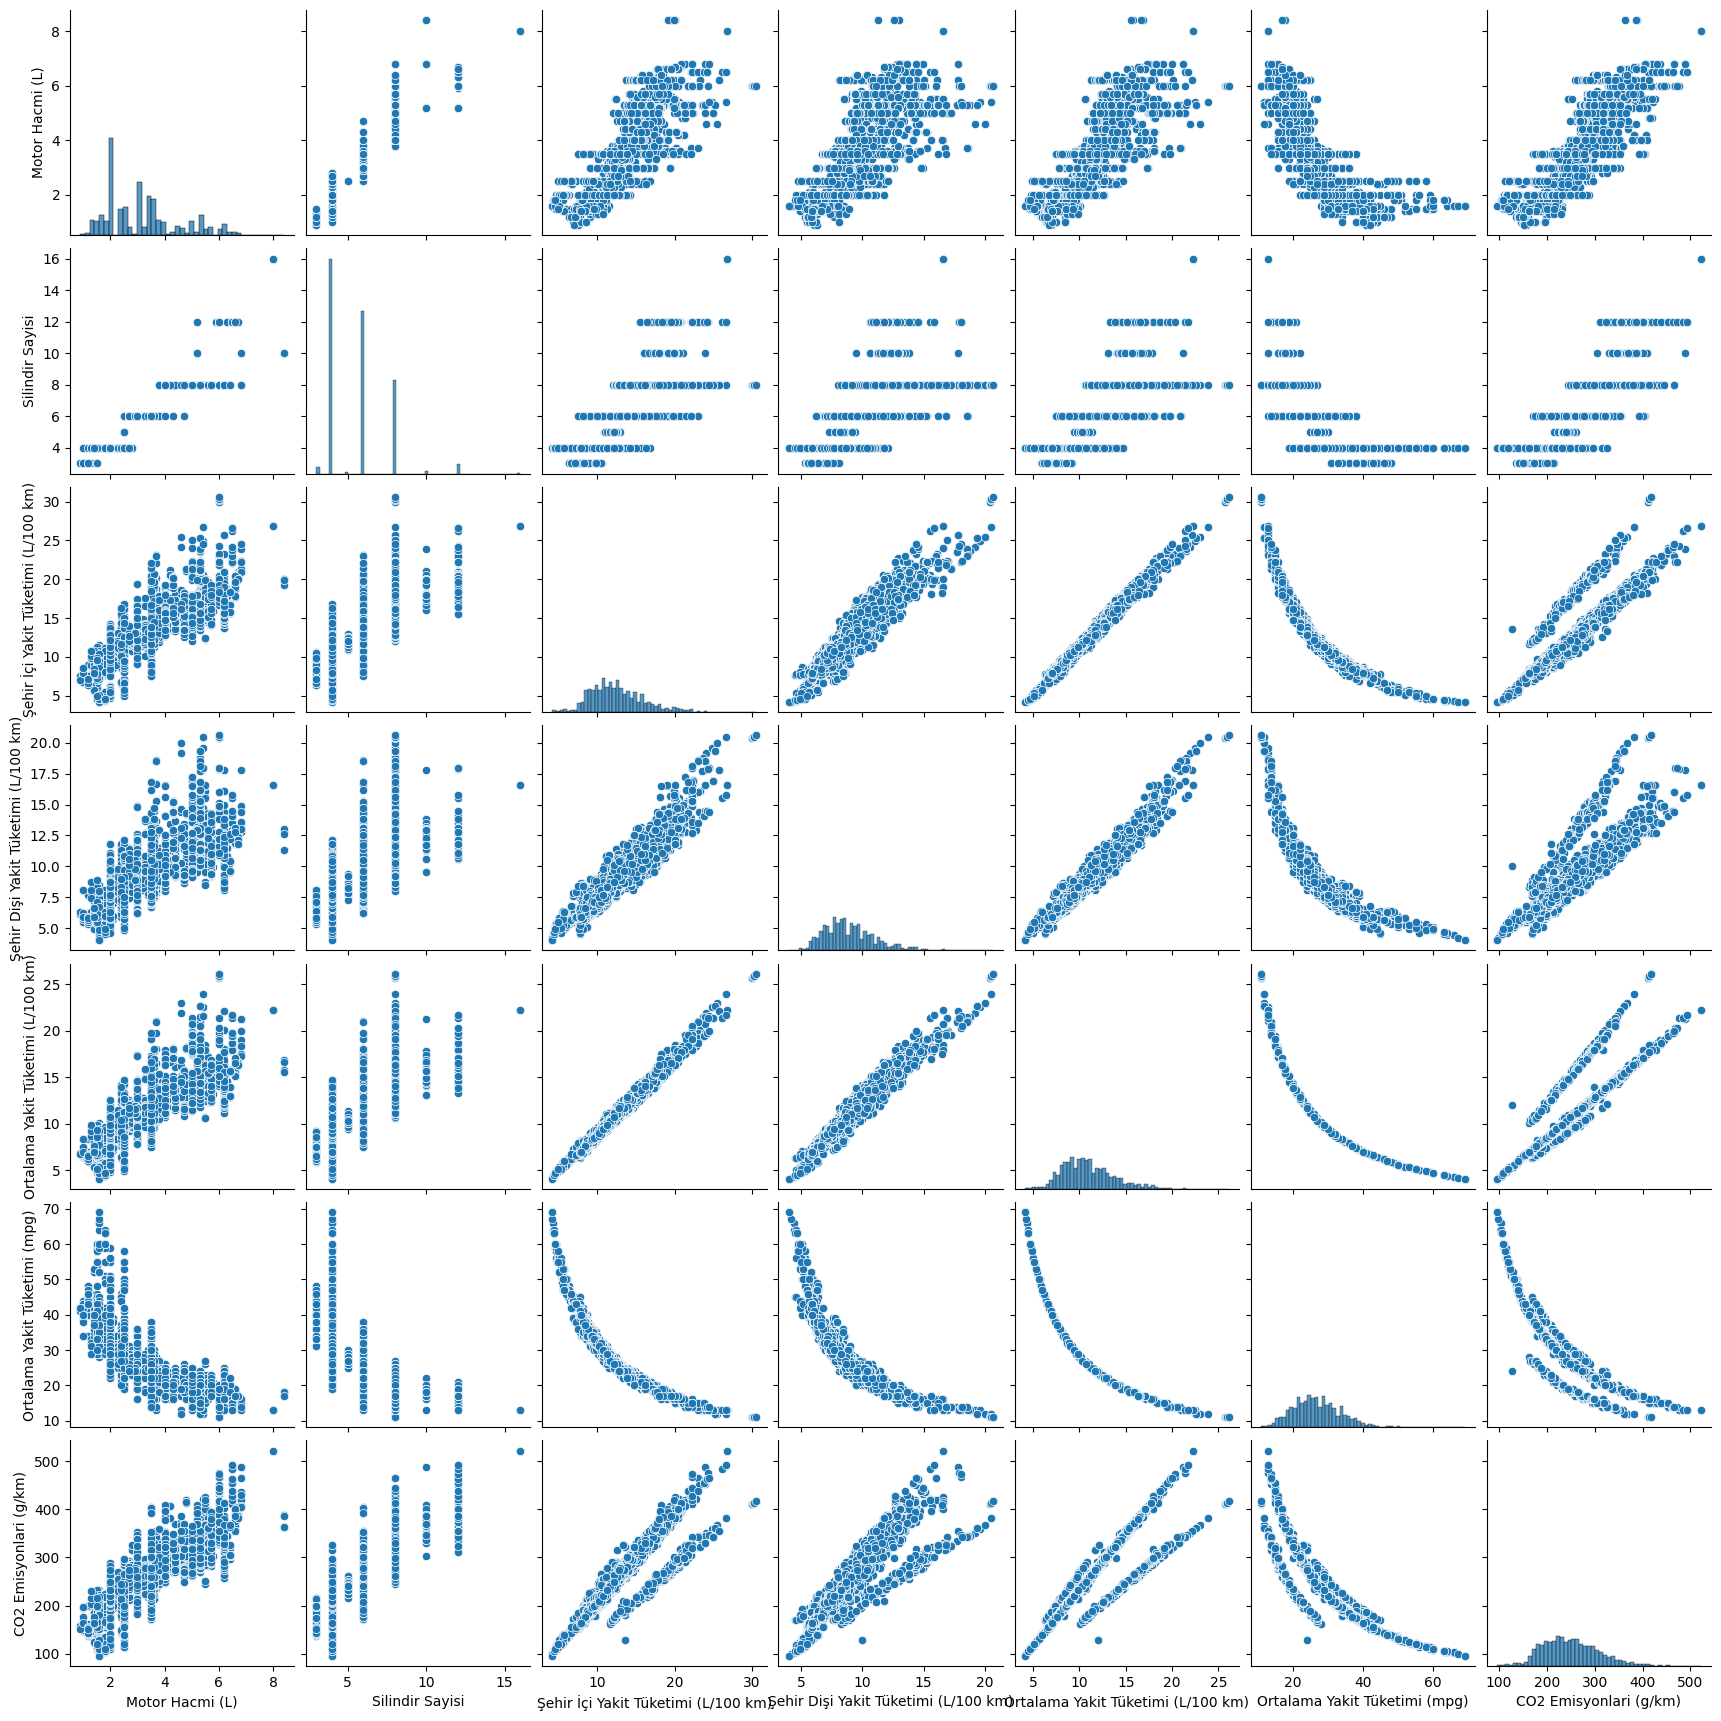

In [23]:
sns.pairplot(df);

In [24]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

# Sadece sayısal verileri içeren bir DataFrame oluştur
numeric_df = df.select_dtypes(include=[np.number])

# Sayısal DataFrame üzerinde korelasyon hesapla ve stillendir
numeric_df.corr().style.applymap(color_correlation1)


# - Korelasyon katsayısı `0.6` ile `0.99999` arasında veya `-0.6` ile `-0.99999` arasında ise, renk `kırmızı` olur.
# Bu, güçlü bir korelasyonu (pozitif veya negatif) gösterir.
# - Eğer korelasyon katsayısı `0.3` ile `0.6` arasında veya `-0.3` ile `-0.6` arasında ise,renk `mavi` olur.
# Bu, orta derecede bir korelasyonu gösterir.
# - Eğer korelasyon katsayısı tam `1` ise, renk `yeşil` olur. Bu, mükemmel pozitif korelasyonu gösterir.
# - Diğer tüm durumlar için renk `siyah` olur, bu da zayıf veya hiç korelasyon olmadığını gösterir.

,Motor Hacmi (L),Silindir Sayisi,Şehir İçi Yakit Tüketimi (L/100 km),Şehir Dişi Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (mpg),CO2 Emisyonlari (g/km)
Motor Hacmi (L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Silindir Sayisi,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Şehir İçi Yakit Tüketimi (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Şehir Dişi Yakit Tüketimi (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Ortalama Yakit Tüketimi (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Ortalama Yakit Tüketimi (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emisyonlari (g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


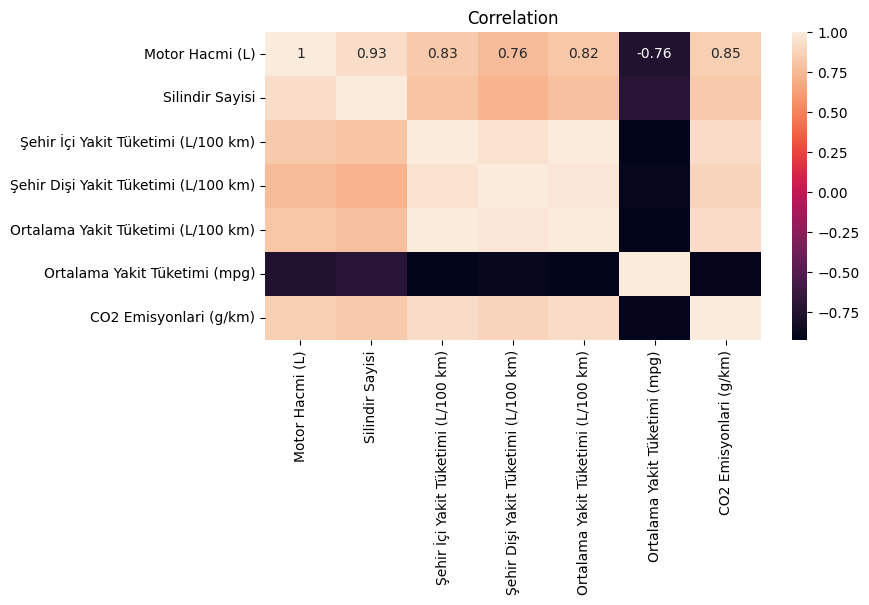

In [25]:
sns.heatmap(numeric_df.corr(),annot=True)
plt.title("Correlation");

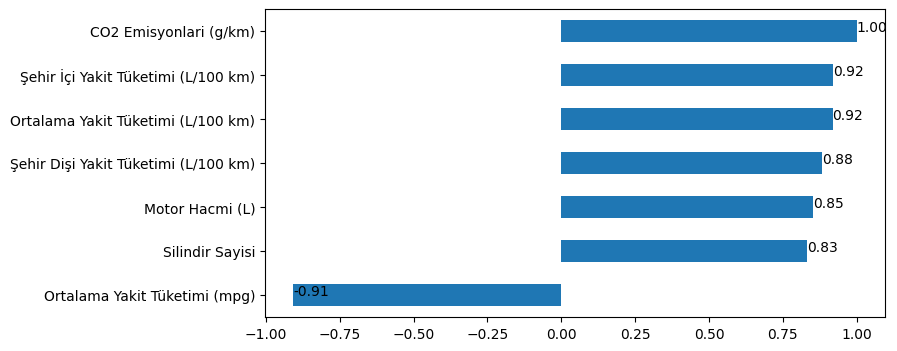

In [26]:
corr_values = numeric_df.corr()["CO2 Emisyonlari (g/km)"].sort_values()
ax = corr_values.plot.barh()
for index, value in enumerate(corr_values):
    plt.text(value, index, "{:.2f}".format(value))

plt.show()

## Simple Linear Regression Model

In [27]:
df.sample(1)

,Marka,Model,Araç Sinifi,Motor Hacmi (L),Silindir Sayisi,Şanziman,Yakit Türü,Şehir İçi Yakit Tüketimi (L/100 km),Şehir Dişi Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (mpg),CO2 Emisyonlari (g/km)
3700,FORD,FUSION AWD,MID-SIZE,2.0,4,AS6,X,11.8,8.1,10.1,28,238


Bağımlı Değişken (Target) = CO2 Emisyonlari (g/km)

Bağımsız Değişken = Motor Hacmi (L) 

y = aX + b

In [28]:
X = df[['Motor Hacmi (L)']] # independent variable
y = df['CO2 Emisyonlari (g/km)'] # dependent variable

In [29]:
corr = df["CO2 Emisyonlari (g/km)"].corr(df["Motor Hacmi (L)"])
corr

0.8511446437900011

In [30]:
r2_score = corr**2
r2_score

0.7244472046524079

bu değer regresyon modelinin bağımsız değişkenler kullanılarak bağımlı değişkenin varyansını ne kadar iyi açıkladığını gösteren bir ölçüdür.

r2_score = .072 değeri gayet iyi bir scoredir

X = df[['Motor Hacmi (L)']] # independent variable
y = df['CO2 Emisyonlari (g/km)'] # dependent variable

bu değişkenleri belirlediğimize göre 

## TRAİN || TEST Split gecelim

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train: Bağımsız değişkenin eğitim seti.

y_train: Bağımlı değişkenin eğitim seti.

-----

X_test: Bağımsız değişkenin test seti.

y_test: Bağımlı değişkenin test seti.

## Training the Model

In [33]:
from sklearn.linear_model import LinearRegression  

In [34]:
slr = LinearRegression() 

In [35]:
slr.fit(X_train, y_train) 

LinearRegression()

y = aX + b

slr.coef_ = "X 'in kat sayısı a"


slr.intercept_ = "Sabit terim b"

In [36]:
slr.coef_

array([36.67696432])

In [37]:
slr.intercept_

134.8718462558531

## Predicting Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train ni kullanarak y_pred i tahmin ediyoruz

In [38]:
y_train_pred = slr.predict(X_train)

In [39]:
y_pred = slr.predict(X_test)

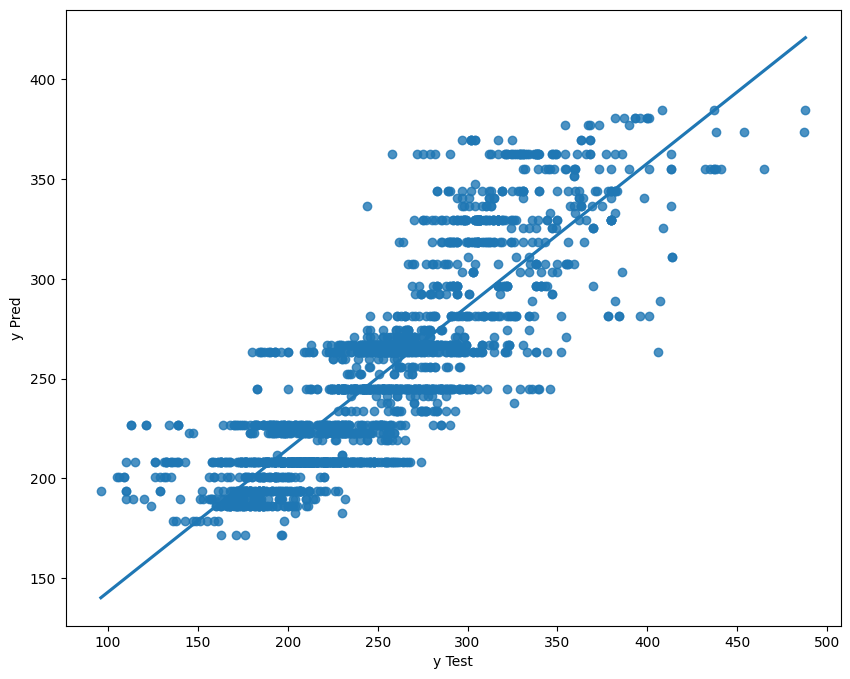

In [40]:
plt.figure(figsize=(10,8))

sns.regplot(x=y_test, y=y_pred, ci=None)

plt.xlabel('y Test')
plt.ylabel('y Pred')

plt.show()

## Evaluating the Model

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# tüm regression metriclerimizi birarada görmek için yukarıdaki fonksiyonu tanımlıyoruz.

In [43]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, "s_linear")
slr_score 

,s_linear_train,s_linear_test
R2,0.725422,0.721870
mae,23.382824,23.073810
mse,945.020045,939.440333
rmse,30.741178,30.650291


R-squared (R²):

s_linear_train (Eğitim Seti): R-squared, modelin eğitim seti üzerindeki başarısını ölçer. 0 ile 1 arasında bir değer alır. 1'e ne kadar yakınsa, modelin eğitim verisi üzerinde o kadar iyi uydurulduğunu gösterir. Bu durumda, 0.725, eğitim seti üzerinde modelin %72.5 başarıyla varyansı açıkladığını gösterir.


s_linear_test (Test Seti): Modelin test seti üzerindeki başarısını gösterir. Eğitim seti R-squared değeriyle karşılaştırıldığında, test seti için R-squared değeri biraz daha düşük (0.721) olabilir, ancak bu durum genellikle beklenendir.


-------


Mean Absolute Error (MAE):

s_linear_train (Eğitim Seti): Ortalama Mutlak Hata, modelin eğitim setindeki tahminlerinin gerçek değerlere göre ortalama ne kadar sapma gösterdiğini ölçer. Bu durumda, eğitim setindeki ortalama sapma 23.38 g/km'dir.


s_linear_test (Test Seti): Modelin test setindeki tahminlerinin gerçek değerlere göre ortalama sapmasıdır. Bu durumda, test setindeki ortalama sapma 23.07 g/km'dir.


-------


Mean Squared Error (MSE):

s_linear_train (Eğitim Seti): Ortalama Kare Hata, modelin eğitim setindeki tahminlerinin gerçek değerlere göre ortalama karesel sapma gösterdiğini ölçer. Bu durumda, eğitim setindeki ortalama karesel sapma 945.02'dir.


s_linear_test (Test Seti): Modelin test setindeki tahminlerinin gerçek değerlere göre ortalama karesel sapmasıdır. Bu durumda, test setindeki ortalama karesel sapma 939.44'tür.


-------


Root Mean Squared Error (RMSE):

s_linear_train (Eğitim Seti): Kök Ortalama Kare Hata, modelin eğitim setindeki tahminlerinin gerçek değerlere göre kök ortalama karesel sapma gösterdiğini ölçer. Bu durumda, eğitim setindeki kök ortalama karesel sapma 30.74'tür.


s_linear_test (Test Seti): Modelin test setindeki tahminlerinin gerçek değerlere göre kök ortalama karesel sapmasıdır. Bu durumda, test setindeki kök ortalama karesel sapma 30.65'tir.

In [46]:
df.head(1)

,Marka,Model,Araç Sinifi,Motor Hacmi (L),Silindir Sayisi,Şanziman,Yakit Türü,Şehir İçi Yakit Tüketimi (L/100 km),Şehir Dişi Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (mpg),CO2 Emisyonlari (g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196


In [47]:
avg_em= df["CO2 Emisyonlari (g/km)"].mean()
avg_em

250.58469871360867

In [44]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

30.650290914517377

RMSE değeri, tahminlerin gerçek değerlere göre ne kadar hata yaptığını ölçen bir metriktir

In [48]:
rmse/avg_em

0.1223150937461962

rmse metriğine göre modelimiz ortalama %12 hata yapıyor.


Kötü tahmnileri cezalandırdığı için rmse metriğimizi tercih ediyoruz. 

Müşteriye modelimizin ortalama %12 hata

## Residuals

In [52]:
#!pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ----- ------------------------------- 41.0/282.6 kB 245.8 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/282.6 kB 476.3 kB/s eta 0:00:01
     --------------- -------------------- 122.9/282.6 kB 554.9 kB/s eta 0:00:01
     ---------------------- ------------- 174.1/282.6 kB 615.9 kB/s eta 0:00:01
     -----------------------------------  276.5/282.6 kB 853.3 kB/s eta 0:00:01
     ------------------------------------ 282.6/282.6 kB 830.4 kB/s eta 0:00:00


In [53]:
from yellowbrick.regressor import PredictionError

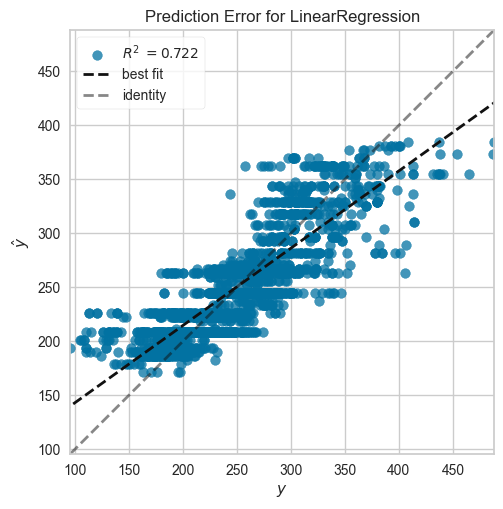

In [54]:
model = LinearRegression() 
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)    
visualizer.score(X_test, y_test)  
visualizer.show(); 

# y ekseninde predictionlarımız, x ekseninde ise gerçek değerlerimiz yer alıyor.silik (gri) olan çizgi modelin tahminlerinin
# mükemmel olduğu noktaları, koyu renki olan çizgi ise modelimizin eğitim sonrası çizdiği best fit line temsil ediyor.
# koyu olan çizgi ile silik olan çizgi ne kadar birbirine yakın olursa modelin tahminleri o kadar iyi demektir.

In [55]:
df.head(1)

,Marka,Model,Araç Sinifi,Motor Hacmi (L),Silindir Sayisi,Şanziman,Yakit Türü,Şehir İçi Yakit Tüketimi (L/100 km),Şehir Dişi Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (mpg),CO2 Emisyonlari (g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196


## Multiple Linear Regression Model

In [56]:
X = df[['Motor Hacmi (L)', 'Ortalama Yakit Tüketimi (L/100 km)', 'Şehir Dişi Yakit Tüketimi (L/100 km)', 'Şehir İçi Yakit Tüketimi (L/100 km)']] 
y = df['CO2 Emisyonlari (g/km)'] 

In [58]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'white'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
 
numeric_df.corr().style.applymap(color_correlation2)

# Featurların kendi arasındaki corr. -0.90, +0.90 'dan büyük olan değerleri istediğimiz renkte göstermesi kullanıyoruz.

,Motor Hacmi (L),Silindir Sayisi,Şehir İçi Yakit Tüketimi (L/100 km),Şehir Dişi Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (mpg),CO2 Emisyonlari (g/km)
Motor Hacmi (L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Silindir Sayisi,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Şehir İçi Yakit Tüketimi (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Şehir Dişi Yakit Tüketimi (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Ortalama Yakit Tüketimi (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Ortalama Yakit Tüketimi (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emisyonlari (g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


## Train | Test Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training the Model

bu veri seti üzerindeki desenleri öğrenir ve bağımlı değişkeni tahmin etmek için kullanılacak katsayıları belirler.

In [62]:
mlr = LinearRegression()

In [63]:
mlr.fit(X_train, y_train)

LinearRegression()

In [67]:
mlr.coef_
#Katsayilari gördük

array([12.63210709, 10.20241882,  0.44286467,  2.68240309])

In [65]:
mlr.intercept_
#Sabit Terim

61.142874656596746

## Predicting Test Data

In [68]:
y_train_pred = mlr.predict(X_train)

In [78]:
y_pred = mlr.predict(X_test)
y_pred

array([247.49314135, 318.24250605, 330.531149  , ..., 203.35582624,
       217.08713403, 322.16751909])

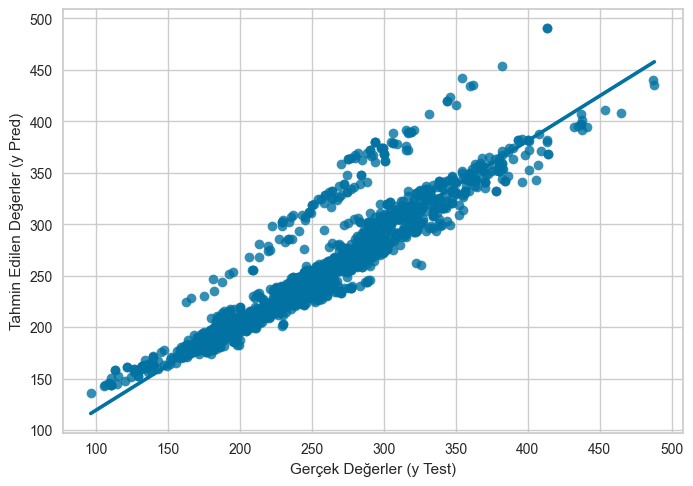

In [70]:
data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

sns.regplot(data=data, x='y_test', y='y_pred', ci=None)
plt.xlabel('Gerçek Değerler (y Test)')
plt.ylabel('Tahmin Edilen Değerler (y Pred)')
plt.show()

## Evaluating the Model

In [72]:
df.head(1)

,Marka,Model,Araç Sinifi,Motor Hacmi (L),Silindir Sayisi,Şanziman,Yakit Türü,Şehir İçi Yakit Tüketimi (L/100 km),Şehir Dişi Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (L/100 km),Ortalama Yakit Tüketimi (mpg),CO2 Emisyonlari (g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196


In [73]:
avg_em= df['CO2 Emisyonlari (g/km)'].mean()
avg_em

250.58469871360867

In [74]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

20.984205165931577

In [75]:
rmse/avg_em   # SLR'de %12 hata yapıyordu

0.08374096771931898

In [76]:
y_pred = mlr.predict(X_test)
y_train_pred = mlr.predict(X_train)

In [77]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.875340,0.869634
mae,13.398754,13.480594
mse,429.044304,440.336866
rmse,20.713385,20.984205


## Cross Validate

In [86]:
from sklearn.metrics import get_scorer_names

scorers = get_scorer_names()
scorers

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [80]:
from sklearn.model_selection import cross_validate, cross_val_score


In [83]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

In [87]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.004987,0.002993,0.887040,0.873955,-13.220992,-13.526457,-383.996184,-434.212112,-19.595821,-20.837757
2,0.001994,0.001993,0.865161,0.876455,-13.708754,-13.267703,-474.356392,-424.136188,-21.779724,-20.594567
3,0.001034,0.001992,0.859194,0.876850,-13.155354,-13.410366,-421.813506,-429.897257,-20.538099,-20.733964
4,0.001993,0.001995,0.877596,0.875015,-13.295459,-13.289930,-428.096489,-429.353865,-20.690493,-20.720856
5,0.000997,0.002012,0.847732,0.878311,-14.734929,-13.245210,-522.778801,-418.688984,-22.864357,-20.461891
6,0.002995,0.003014,0.859142,0.876964,-13.318422,-13.347580,-452.071122,-426.530558,-21.261964,-20.652616
7,0.001970,0.002026,0.893665,0.873118,-12.895122,-13.501497,-390.737373,-433.352294,-19.767078,-20.817115
8,0.000998,0.002005,0.895928,0.872969,-12.723611,-13.628083,-362.333045,-436.634614,-19.035048,-20.895804
9,0.002993,0.003989,0.872817,0.875574,-13.119481,-13.412327,-407.167555,-431.491839,-20.178393,-20.772382
10,0.001962,0.001995,0.882739,0.874342,-14.022955,-13.345600,-463.195593,-425.302805,-21.521979,-20.622871


In [88]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                0.874101
train_r2                               0.875355
test_neg_mean_absolute_error         -13.419508
train_neg_mean_absolute_error        -13.397475
test_neg_mean_squared_error         -430.654606
train_neg_mean_squared_error        -428.960052
test_neg_root_mean_squared_error     -20.723296
train_neg_root_mean_squared_error    -20.710982
dtype: float64

In [85]:
mlr_score = train_val(y_train, y_train_pred, y_test, y_pred, "m_linear")
mlr_score

,m_linear_train,m_linear_test
R2,0.875340,0.869634
mae,13.398754,13.480594
mse,429.044304,440.336866
rmse,20.713385,20.984205


In [89]:
pd.concat([slr_score, mlr_score], axis=1)

,s_linear_train,s_linear_test,m_linear_train,m_linear_test
R2,0.725422,0.721870,0.875340,0.869634
mae,23.382824,23.073810,13.398754,13.480594
mse,945.020045,939.440333,429.044304,440.336866
rmse,30.741178,30.650291,20.713385,20.984205


In [92]:
mlr.coef_

array([12.63210709, 10.20241882,  0.44286467,  2.68240309])

In [91]:
mlr_df = pd.DataFrame(mlr.coef_, index=X_train.columns, columns = ["mlr_coef"])
mlr_df

,mlr_coef
Motor Hacmi (L),12.632107
Ortalama Yakit Tüketimi (L/100 km),10.202419
Şehir Dişi Yakit Tüketimi (L/100 km),0.442865
Şehir İçi Yakit Tüketimi (L/100 km),2.682403


## Residuals

In [93]:
residuals = y_test-y_pred
#Error hesaplayalım

residualler;

1- hatanın 0 olduğu eksenin her iki tarafına da yaklaşık olarak hem eşit hem de random  olarak dağılacak
ayrıca pattern içermemeli

2- Bu dağılım normal dağılıma uygun olacak

eğer bu şartlar sağlanıyorsa data linear reg. için uygun bir datadır diyebiliriz.

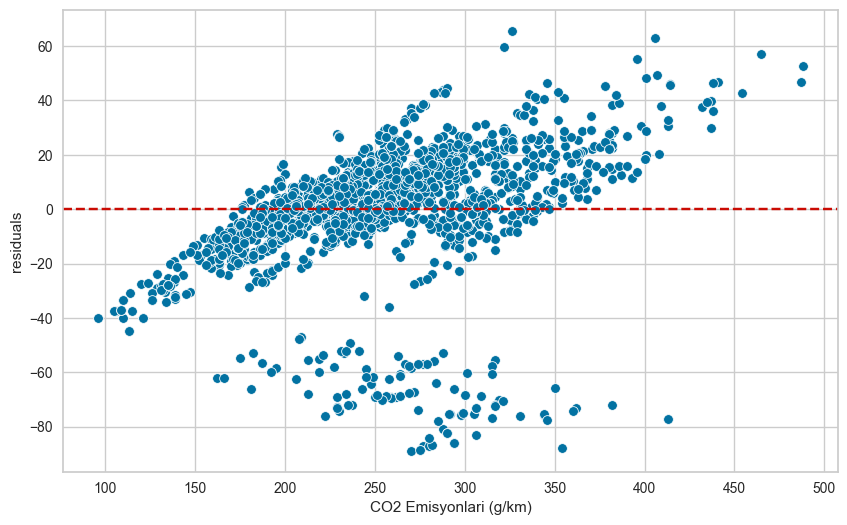

In [94]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals");

Yatay kırmızı kesikli çizgi, y=0 noktasını gösterir. Bu nokta, artıkların sıfır olduğu, yani tahminlerin doğru olduğu noktadır. 

Bu noktaya ne kadar yakın olursanız, modeliniz o kadar iyi tahmin yapar demektir. Bu noktadan ne kadar uzaklaşırsanız, modeliniz o kadar kötü tahmin yapar demektir.

Pozitif artıklar, modelinizin gerçek değerlerden daha düşük tahminler yaptığını gösterir. Bu, modelinizin eksik tahmin yaptığı anlamına gelir.

Negatif artıklar, modelinizin gerçek değerlerden daha yüksek tahminler yaptığını gösterir. Bu, modelinizin fazla tahmin yaptığı anlamına gelir. 


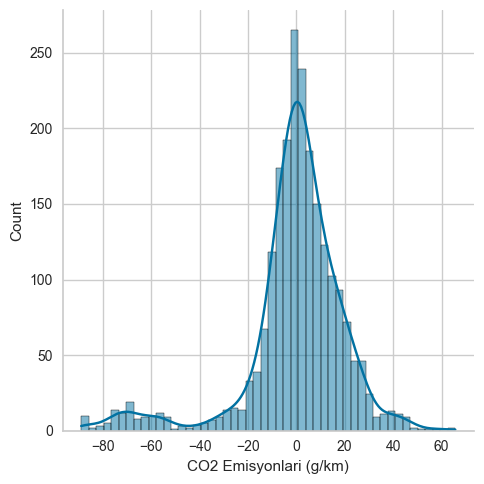

In [96]:
sns.displot((y_test-y_pred), bins=50, kde=True);

# residulerin kdeplotu üzerinden normal dağılıma uyup uymadığ kontrol edilebilir

Grafiğin şekli, yaklaşık olarak normal görünür ve 0 etrafında bir tepe noktası vardır. Bu, artıkların çoğunun 0’a yakın olduğunu ve modelinizin çoğu veri noktasını iyi tahmin ettiğini gösterir. 

Ancak, grafiğin kuyrukları biraz uzundur ve bazı artıkların çok yüksek veya çok düşük olduğunu gösterir. Bu, modelinizin bazı veri noktalarını iyi tahmin edemediğini gösterir.